In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import clear_output

import pandas as pd
import numpy as np
classes = {0:'T-shirt/top',
           1:'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag', 
           9: 'Ankle Boot'}

In [2]:
selected_labels = [0, 1, 5, 8, 9]

data = pd.read_csv('fashion_MNIST/fashion-mnist_train.csv')
data = data.loc[data['label'].isin(selected_labels)].reset_index(drop=True)

labels = data.pop('label')
index = 0
data = data.values
images = np.reshape(data, (-1, 28, 28))

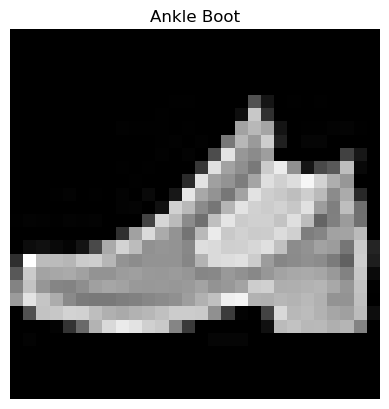

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[index].squeeze(), cmap = 'gray')
plt.title(classes[labels[index]])
plt.axis('off')
plt.show()
index += 1

# PCA step by step
Here is the short summary of the required steps:
* **Scale the data** — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters
* **Calculate covariance matrix** — square matrix giving the covariances between each pair of elements of a random vector
* **Eigen Decomposition**


# Scale the Data:
Standardize features. to do so, use this formula: $$z = \frac{(x - \mu)}{\sigma}$$
where $\mu$ is mean and $\sigma$ is standard deviation.

In [4]:
data.dtype

dtype('int64')

In [5]:
# Code Here
mean_ = np.mean(data, axis=0, dtype=np.double)
print("mean is:", mean_)
std_ = np.std(data, axis=0, dtype=np.double)
print("STD is:", std_)
X_scaled = (data - mean_) / std_
print("Scaled is:", X_scaled)

mean is: [4.66666667e-04 8.36666667e-03 4.33333333e-02 1.15333333e-01
 2.28733333e-01 3.87200000e-01 7.41766667e-01 1.93673333e+00
 5.06120000e+00 1.35435333e+01 3.39841667e+01 4.22904667e+01
 4.02300333e+01 4.08329333e+01 4.18682667e+01 4.27672333e+01
 4.37014667e+01 4.12083667e+01 3.06112333e+01 1.17672667e+01
 4.77233333e+00 2.62186667e+00 1.83263333e+00 1.41100000e+00
 8.11333333e-01 4.57733333e-01 1.80433333e-01 3.54000000e-02
 9.86666667e-03 3.32666667e-02 1.31800000e-01 4.27600000e-01
 8.01233333e-01 2.08253333e+00 6.53476667e+00 1.42644000e+01
 2.39463333e+01 4.05110333e+01 6.80420000e+01 7.88574333e+01
 8.53962000e+01 8.58626333e+01 8.39490667e+01 8.87426000e+01
 8.77383333e+01 7.90075667e+01 6.74927000e+01 4.04169333e+01
 2.49151333e+01 1.56358667e+01 9.02123333e+00 6.01683333e+00
 4.01623333e+00 2.25586667e+00 9.03733333e-01 1.62666667e-01
 3.14333333e-02 1.10633333e-01 3.35200000e-01 8.93966667e-01
 2.41560000e+00 1.00843667e+01 2.06475000e+01 2.65466667e+01
 3.24113333e+01

# Calculate Covariance Matrix:
Let’s take a step back here and understand the difference between variance and covariance. Variance reports variation of a single random variable — let’s say the weight of a person, and covariance reports how much two random variables vary — like weight and height of a person.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances.

For further information about covariance visit [wikipedia](https://en.wikipedia.org/wiki/Covariance).

In [6]:
def cov_calc_matrix(X):
    N, M = X.shape
    cov = np.zeros((M, M))

    for i in range(M):
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            mean_j = np.sum(X[:, j]) / N
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1) # covariance between i & j
            
    return cov

In [7]:
# CODE Here
# using built-in functions like np.cov is NOT allowed

cov_matrix = cov_calc_matrix(X_scaled)

##

assert cov_matrix.shape == (784,784) , "covariance matrix shape should be 784 * 784"

cov_matrix[0:5, 0:5]

array([[1.00003333, 0.10344873, 0.02532451, 0.02635544, 0.0259777 ],
       [0.10344873, 1.00003333, 0.67948885, 0.16289888, 0.05367159],
       [0.02532451, 0.67948885, 1.00003333, 0.29368204, 0.0353962 ],
       [0.02635544, 0.16289888, 0.29368204, 1.00003333, 0.55370309],
       [0.0259777 , 0.05367159, 0.0353962 , 0.55370309, 1.00003333]])

As you can see, the diagonal elements are identical, and the matrix is symmetrical. Up next, eigendecomposition.

# Eigendecomposition
`Eigendecomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues.` <font color='red'>Eigenvectors are simple unit vectors</font>, and <font color='green'>eigenvalues are coefficients which give the magnitude to the eigenvectors. </font>

We know so far that our `covariance matrix is symmetrical.` As it turns out, `eigenvectors of symmetric matrices are orthogonal.` For PCA this means that we have the first principal component which explains most of the variance. Orthogonal to that is the second principal component, which explains most of the remaining variance. This is repeated for N number of principal components, where N equals to number of original features.

And this turns out to be neat for us — principal components are sorted by percentage of variance explained, as we can decide how many should we keep. For example, if we have 100 features originally, but the first 3 principal components explain 95% of the variance, then it makes sense to keep only these 3 for visualizations and model training.


In [8]:
# Code Here
# Implementing the functions to return eigen vectors and values are optional and have extra score.
e_values, e_vectors = np.linalg.eig(cov_matrix)
sorted_index = np.argsort(e_values)[::-1]
eig_values = e_values[sorted_index]
eig_vectors = e_vectors[:,sorted_index]
##


print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [153.06599858 134.58513832  53.62624634  45.83523074  35.94793614
  27.1722212   16.16894956  11.26325146   9.89960743   8.76881916]


Last 10 eigenvalues: [0.00828885 0.00803624 0.00777916 0.00706446 0.00676059 0.00665393
 0.00618789 0.00571599 0.00547391 0.00451621]


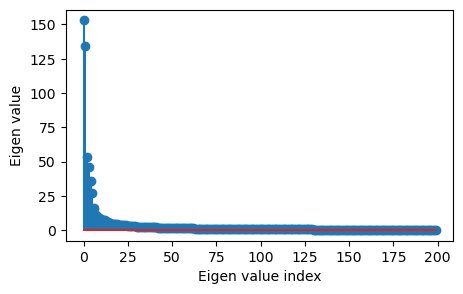

In [9]:
plt.figure(figsize=(5,3))
plt.stem(eig_values[:200])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [10]:
for i in range(200):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 19.523073518199503 % variance
Eigenvectors upto 2 expresses 36.68897302741586 % variance
Eigenvectors upto 3 expresses 43.52882746554153 % variance
Eigenvectors upto 4 expresses 49.37496303896839 % variance
Eigenvectors upto 5 expresses 53.960006135397585 % variance
Eigenvectors upto 6 expresses 57.42573514793011 % variance
Eigenvectors upto 7 expresses 59.48803241770394 % variance
Eigenvectors upto 8 expresses 60.92462374642835 % variance
Eigenvectors upto 9 expresses 62.18728668600387 % variance
Eigenvectors upto 10 expresses 63.30572123534585 % variance
Eigenvectors upto 11 expresses 64.34015921745102 % variance
Eigenvectors upto 12 expresses 65.30345377006299 % variance
Eigenvectors upto 13 expresses 66.22157672421169 % variance
Eigenvectors upto 14 expresses 66.99535115019921 % variance
Eigenvectors upto 15 expresses 67.74056613252277 % variance
Eigenvectors upto 16 expresses 68.4381673582634 % variance
Eigenvectors upto 17 expresses 69.06144815928648

# Visualizations
## Eigenvector Visualization

Project the scaled input into the first and second eigen vector and see the result.

In [11]:
# Code Here
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])

##
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = labels
res2d.head()

,PC1,PC2,Y
0,-13.846035,-3.141500,9
1,13.780054,8.119654,0
2,-4.080987,-20.163169,5
3,4.344533,0.808241,8
4,21.412902,19.844596,0


## 2D Visualization

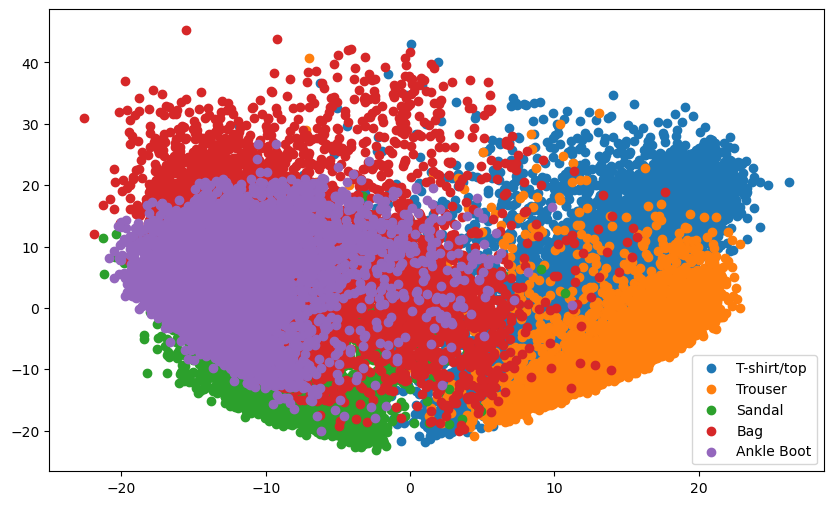

In [12]:
plt.figure(figsize=(10,6))
for label in selected_labels:
    label_name = classes[label]
    coords = res2d[res2d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

Besides the above projections, project the scaled input on the third eigen vector to see the 3D visualization.

In [13]:
# Code Here
projected_3 = X_scaled.dot(eig_vectors.T[2])

##
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Y'] = labels
res3d = res3d.head(500)

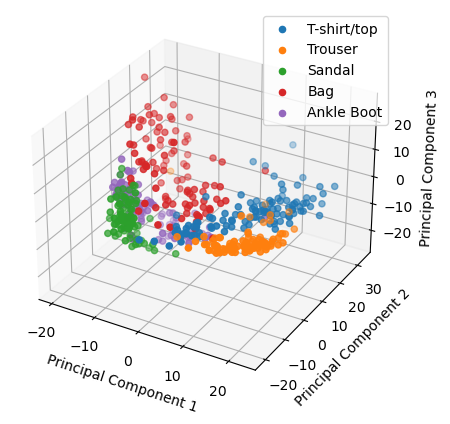

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for label in selected_labels:
    label_name = classes[label]
    coords = res3d[res3d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Reconstruction from Principal Component
## Reduction/Compression Phase:
<img src="https://i.stack.imgur.com/CKI4U.png" alt="drawing" style="width:200px;"/>

Above is the general form of vector on vector projection formula, in order to reconstruct our image we need to find the projection of our X_scaled ($a$) on each of the reduced_eigen_space vectors ($v$) (Note that our calculated eigen vectors are unit vectors, therefore, the denominator equals to one).

Determine the number of eigen vectors needed to project image on, such that images can still be recognizable. Note that this number should NOT be accurate and something approximate is enough (don't message TAs about the accuracy :)) ).

In [15]:
# Code Here
number_of_eigen_vectors = 175

##
reduced_eigen_space = eig_vectors[:, :number_of_eigen_vectors]

In [16]:
# Code Here
X_compressed = X_scaled.dot(reduced_eigen_space)

##

assert X_compressed.shape == (X_scaled.shape[0], number_of_eigen_vectors), "shape of X_compresed is wrong"

print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (30000, 784)
Shape of reduced_eigen_space: (784, 175)
Shape of X_compressed: (30000, 175)


## Reconstrunction Phase:

In [17]:
# Code Here
X_reconstructed = X_compressed.dot(reduced_eigen_space.T)                # Reconstructed data
data_reconstructed = X_reconstructed * std_ + mean_             # De-standardized data

##

reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))

print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (30000, 175)
Shape of reduced_eigen_space: (784, 175)
Shape of X_reconstructed: (30000, 784)


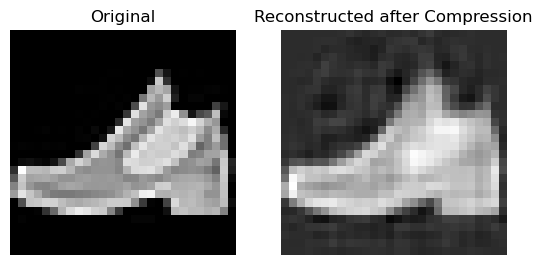

In [18]:
rec_index = 0

f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1
